#Câu 1: Khám phá và Tiền xử lý Dữ liệu

In [13]:
#1.1 tải dữ liệu
import pandas as pd
df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [14]:
#1.2 Xem thông tin tổng quan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [15]:
# Mô tả thống kê
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [20]:
#1.3 Tiền xử lí dữ liệu
# Đổi tên cột
df.rename(columns={
    'Siblings/Spouses Aboard': 'Sisp',
    'Parents/Children Aboard': 'Parch'
}, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,Sisp,Parch,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [26]:
# Giữ lại các cột cần tính toán
df_clean = df[['Survived', 'Pclass', 'Sex', 'Age', 'Sisp', 'Parch', 'Fare']]
df_clean

,Survived,Pclass,Sex,Age,Sisp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [27]:
#Diền missing value cho cột age bằng giá trị media
df_clean['Age'].fillna(df_clean['Age'].median())

#Mã hóa cột Sex: male =0, female = 1
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})

/tmp/ipython-input-27-4193698813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})


In [28]:
#in ra 5 dòng đầu tiên của df_clean
df_clean.head(5)

,Survived,Pclass,Sex,Age,Sisp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Đặt style chung
sns.set_style('whitegrid')

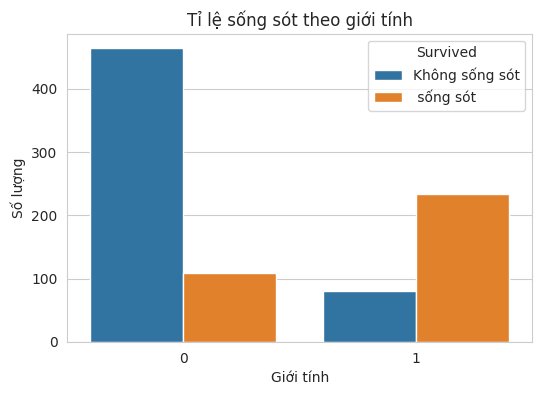

In [35]:
# biểu đồ 1. Tỉ lệ sống sót theo giới tính
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df_clean)
plt.title('Tỉ lệ sống sót theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(title='Survived', labels=['Không sống sót', ' sống sót'])
plt.show()

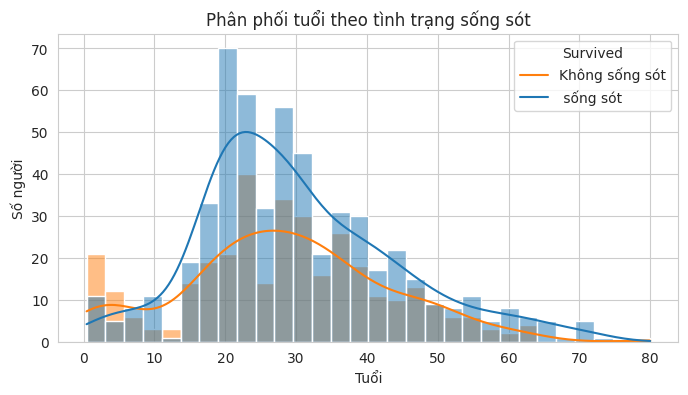

In [36]:
#Biểu đò 2. Phân phối tuổi theo tình trạng sống sót
plt.figure(figsize=(8, 4))
sns.histplot(x='Age', hue='Survived', data=df_clean, bins=30, kde=True)
plt.title('Phân phối tuổi theo tình trạng sống sót')
plt.xlabel('Tuổi')
plt.ylabel('Số người')
plt.legend(title='Survived', labels=['Không sống sót', ' sống sót'])
plt.show()

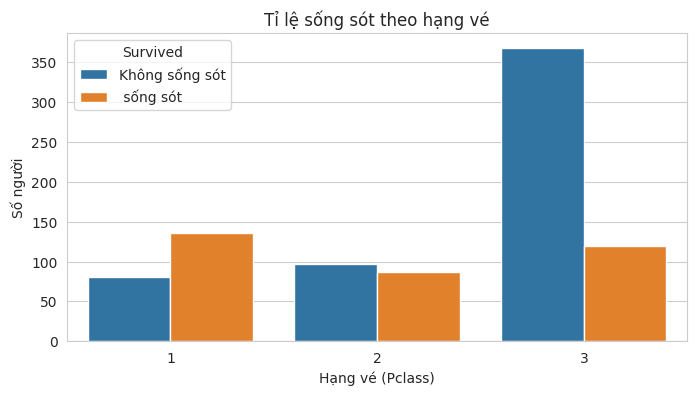

In [37]:
#Biểu đò 3. Tỉ lệ sống sót theo hạng vé
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Survived', data=df_clean)
plt.title('Tỉ lệ sống sót theo hạng vé')
plt.xlabel('Hạng vé (Pclass)')
plt.ylabel('Số người')
plt.legend(title='Survived', labels=['Không sống sót', ' sống sót'])
plt.show()

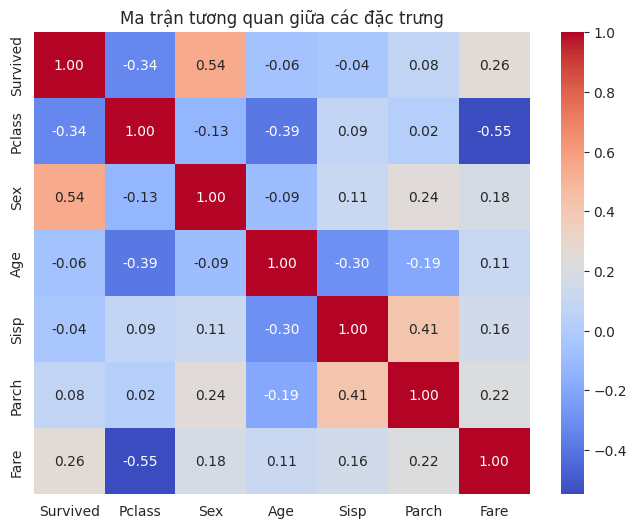

In [38]:
# Biểu đồ số 4: Ma trận tương quan giữa các đặc trưng

plt.figure(figsize=(8,6))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.show()

#Câu 2: Phân chia dữ liệu và huấn luyện mô hình


In [39]:
from re import X
# 2.1 Tách dl thành x và y
x = df_clean.drop('Survived', axis=1) # axis = 1: Thao tác trên cột theo chiều ngang, = 0 thao tác trên hàng thoe chiều dọc
y = df_clean['Survived']
print("Đặc trưng")
X


Đặc trưng


re.VERBOSE

In [40]:
print("Biến mục tiêu")
y

Biến mục tiêu


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
882,0
883,1
884,0
885,1


In [41]:
# 2.2 Chia train/test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 730 to 102
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  709 non-null    int64  
 1   Sex     709 non-null    int64  
 2   Age     709 non-null    float64
 3   Sisp    709 non-null    int64  
 4   Parch   709 non-null    int64  
 5   Fare    709 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 38.8 KB


In [43]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 296 to 762
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  178 non-null    int64  
 1   Sex     178 non-null    int64  
 2   Age     178 non-null    float64
 3   Sisp    178 non-null    int64  
 4   Parch   178 non-null    int64  
 5   Fare    178 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 9.7 KB


In [45]:
#2.3 Huấn luyện mô hình cây quyết định
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

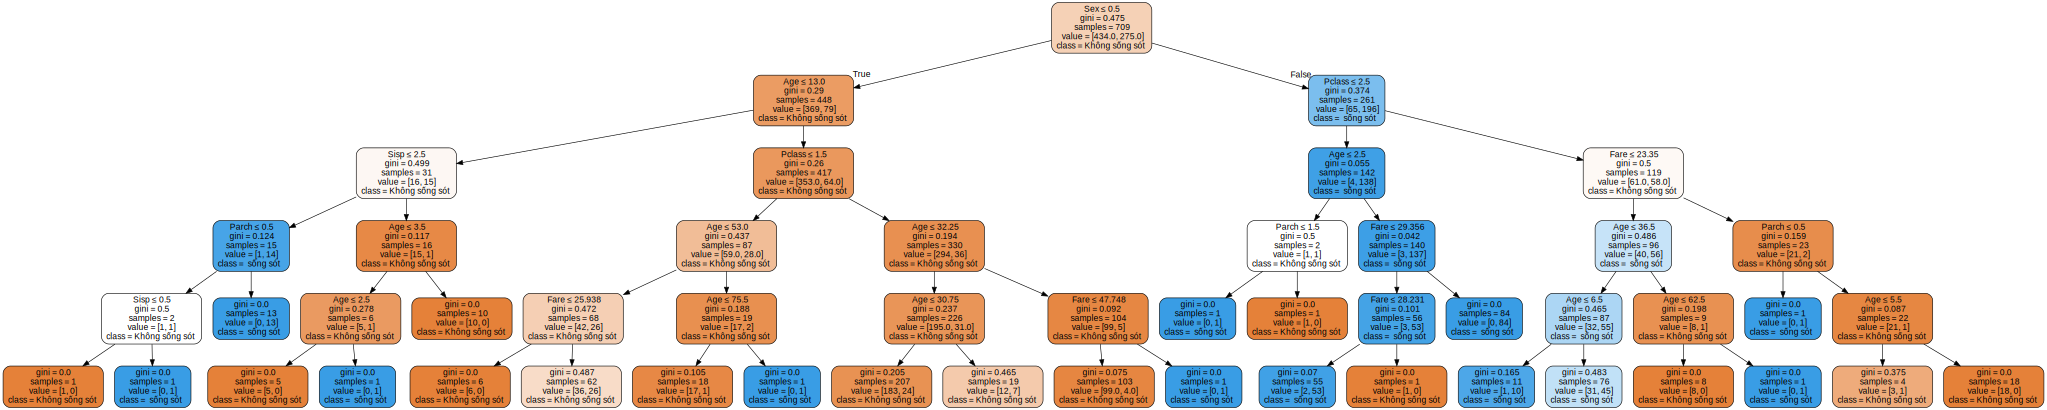

In [46]:
import graphviz
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=x.columns,
    class_names=['Không sống sót', ' sống sót'],
    filled=True,
    rounded=True,
    special_characters=True
)

graphviz.Source(dot_data)

In [47]:
# 2.4 Huấn luyện mô hình Naive bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

#Câu 3: Đánh giá và so sánh mô hình


In [48]:
# 3.1 Dự đoán
y_pred_dt = dt_model.predict(x_test)
y_pred_nb = nb_model.predict(x_test)

In [50]:
# 3.2 Đánh giá Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy (DT):", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy (DT): 0.797752808988764
Confusion Matrix:
 [[99 12]
 [24 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       111
           1       0.78      0.64      0.70        67

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



Dự đoán người ko qua khỏi: 99.
Người sống sót: 43 người.
Người ko qua khỏi thành sống sót là 12 người

In [51]:
# 3.3 Đánh giá mô hình naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy (DT):", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy (DT): 0.7359550561797753
Confusion Matrix:
 [[95 16]
 [31 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       111
           1       0.69      0.54      0.61        67

    accuracy                           0.74       178
   macro avg       0.72      0.70      0.70       178
weighted avg       0.73      0.74      0.73       178



3.4 Mô hình decision tree cho kết quả tốt hơn. Ưu điểm là vẽ được cây. Nhược điểm là overflitting. Dữ liệu không quan trọng cũng được biểu diễn

#Câu 4: Sử dụng bộ dữ liệu điểm thi THPTQG 2024:
